# Software Coaching for Python
# Week 6: Project Presentation

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
path = "/content/gdrive/Shareddrives/Software_Coaching_Fall_2021"
my_folder = "HLP"     # *** REPLACE WITH YOUR FOLDER NAME ***
data_folder = f"{path}/{my_folder}/for final project"


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Executive Summary

### Name

박혜림

### Target Web Site

aier.org: https://www.aier.org/articles/


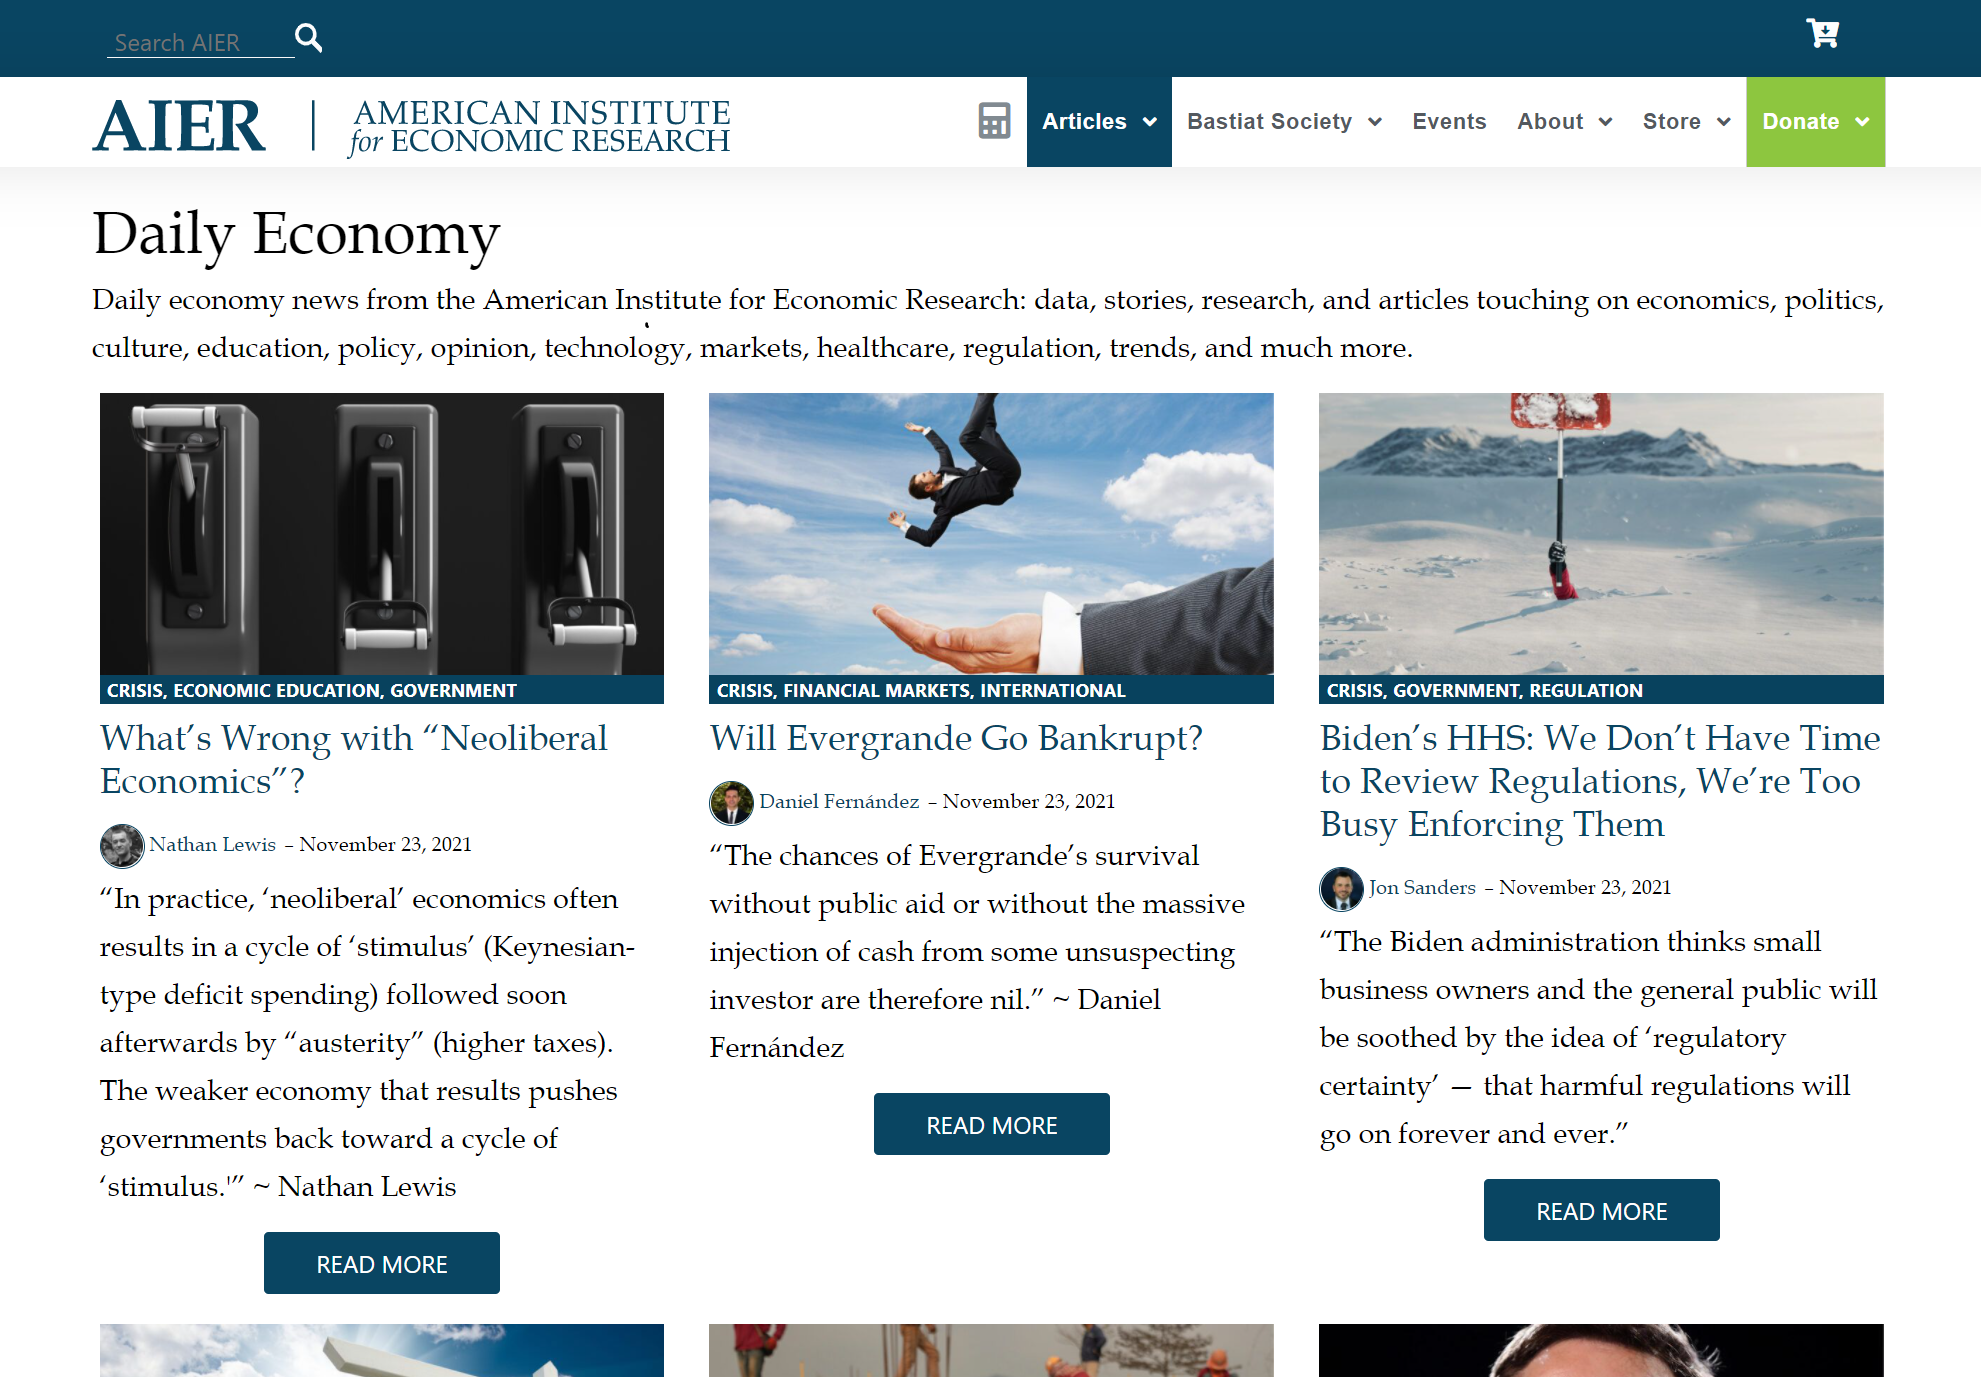

In [ ]:
from IPython.display import Image
Image(f"{data_folder}/homepage.PNG")

### Reasons Why I Chose the Web Site

aier.org은 약 1940년부터 현재까지 미국의 경제기사를 위주로 다루는 사이트로서, 미국의 경제관련 최신뉴스들이 상당히 많이 존재함. 이처럼 80년도에 걸친 대량의 기사를 수집해, 다양한 텍스트 분석을 해보면 흥미로울 거 같았음.

### Total Number of Web Articles Collected

11073

### Data Time Range

1940 - 2021


### Key Findings and Lessons

- aier.org 사이트의 특성상 예상한 바와 같이 경제와 관련된 정보가 주로 수집되었음

- 타임시리즈 분석을 통해, 제일 많은 기사가 수집된 2020년도를 대상으로 텍스트분석을 진행한 결과 해당 년도의 주 이슈인 코로나19 와 관련된 내용이 있다는 것을 확인 할 수 있었음.


### Major Challenges

- 키워드 분석에 있어 본문이 p태그로 문단별로 나뉘어져 있고, 본문만이 아닌 저자정보,게시일 등이 한 태그로묶여져있어 본문에 대한 텍스트 분석을 어렵게 만들었음.

- 경제관련된 내용을 위주로 텍스트 분석을 하다보니 결과를 해석하는데 있어, 경계가 모호했음.

## Installing Necessary Packages

In [ ]:
! pip install --user nltk scikit-learn pyldavis textblob

     |████████████████████████████████| 1.7 MB 4.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 11.3 MB 44.0 MB/s 
     |████████████████████████████████| 15.7 MB 51.4 MB/s 
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=a14e66f8505ea327fc3cf86d482983ae8c9e14bf983bd60bb43f16ff9dce8e23
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyldavis
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 

## Loading Data

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', 150)

df = pd.read_csv(f"{data_folder}/html_data_final2.csv", sep="\t")
df = df.dropna(subset=["title", "body"], axis=0)
df.datetime = df.datetime.astype("datetime64")
df

,file_name,title,author,datetime,body
0,statistical-indicators-of-business-cycle-changes-32.html,Statistical Indicators of Business-Cycle Changes,AIER Staff,NaT,"– July 27, 1953 AIER >> Archive >> Business Conditions Print Research Reports – 07/27/1953 RR19530727 AIER Staff Founded in 1933,..."
1,the-commercial-banks-sell-government-securities.html,The Commercial Banks Sell Government Securities,AIER Staff,NaT,"– July 20, 1953 AIER >> Archive >> Research >> Economic Education >> Central Banking Print Research Reports – 07/20/1953 RR1953..."
2,survey-of-consumer-finances.html,Survey of Consumer Finances,AIER Staff,NaT,"– July 13, 1953 AIER >> Archive >> Economic Education Print Research Reports – 07/13/1953 RR19530713 AIER Staff Founded in 1933, ..."
3,statistical-indicators-of-business-cycle-changes-31.html,Statistical Indicators of Business-Cycle Changes,AIER Staff,NaT,"– June 29, 1953 AIER >> Archive >> Research >> Economic Trends >> Business Conditions Print Research Reports – 06/29/1953 RR195..."
4,the-treasurys-dilemma.html,The Treasury’s Dilemma,E.C. Harwood,NaT,"– June 22, 1953 AIER >> Archive >> Sound Money >> Research Print Research Reports – 06/22/1953 RR19530622 E.C. Harwood Edward ..."
...,...,...,...,...,...
11067,limited-government-and-money-a-review-of-money-and-the-rule-of-law.html,Limited Government and Money: A Review of Money and the Rule of Law,Daniel Sutter,2021-10-26,"Daniel Sutter – October 26, 2021 Reading Time: 3 minutes AIER >> Daily Economy >> Monetary Policy >> Economic Education >> Book..."
11068,all-value-is-subjective-and-thats-a-good-thing.html,"All Value Is Subjective, and That’s a Good Thing",James E. Hanley,2021-10-26,"James E. Hanley – October 26, 2021 Reading Time: 5 minutes AIER >> Daily Economy >> Free Markets >> Economic Theory >> Economic..."
11069,the-semantic-revolution.html,The Semantic Revolution,Daniel B. Klein,2021-10-25,"Daniel B. Klein – October 25, 2021 Reading Time: 3 minutes AIER >> Daily Economy >> History >> Government >> Classical Liberali..."
11070,why-government-cover-ups-succeed.html,Why Government Cover-Ups Succeed,James Bovard,2021-10-25,"James Bovard – October 25, 2021 Reading Time: 7 minutes AIER >> Daily Economy >> War and Peace >> Media >> Government >> Aut..."




https://www.aier.org/article/limited-government-and-money-a-review-of-money-and-the-rule-of-law/

1940년대부터 매우 긴 기간의 기사를 수집해왔기에, 날짜 정보가 없는, 본문 정보가 존재하지 않은 오래된 문서는 삭제 후 분석을 진행하였음.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11072 entries, 0 to 11071
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   file_name  11072 non-null  object        
 1   title      11072 non-null  object        
 2   author     8785 non-null   object        
 3   datetime   6885 non-null   datetime64[ns]
 4   body       11072 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 519.0+ KB


In [ ]:
df=df[(df.datetime < "2021-11-15") & (df.datetime >= "2008-11-24")]
df=df.reset_index(drop=True)

In [ ]:
df.datetime.min(), df.datetime.max()

(Timestamp('2008-11-24 00:00:00'), Timestamp('2021-11-14 00:00:00'))

## Popular Keywords Ranking

In [ ]:
import nltk
nltk.download(['punkt', 'averaged_perceptron_tagger', 'stopwords'])

df["words"] = df.body.apply(lambda x: nltk.word_tokenize(x))
df["tagged_words"] = df.words.apply(lambda x: nltk.pos_tag(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stemmer=nltk.stem.SnowballStemmer("english")
df['stems']=df['words'].apply(lambda x: [stemmer.stem(word) for word in x])
df["tagged_words_ver2"] = df.stems.apply(lambda x: nltk.pos_tag(x))


단복수와, 대소문자를 처리하기 위해  snowballstemmer를 이용해 전처리 진행함. 


In [ ]:
df

,file_name,title,author,datetime,body,words,tagged_words,stems,tagged_words_ver2
0,which-is-better-high-or-low-inflation.html,“Which is Better: High or Low Inflation?”,Tom Duncan,2010-10-05,"Tom Duncan – October 5, 2010 Reading Time: < 1 minute AIER >> Sound Money Project >> Sound Money Project >> Sound Banking >> Mo...","[Tom, Duncan, –, October, 5, ,, 2010, Reading, Time, :, <, 1, minute, AIER, >, >, Sound, Money, Project, >, >, Sound, Money, Project, >, >, Sound,...","[(Tom, NNP), (Duncan, NNP), (–, NNP), (October, NNP), (5, CD), (,, ,), (2010, CD), (Reading, NN), (Time, NN), (:, :), (<, JJ), (1, CD), (minute, N...","[tom, duncan, –, october, 5, ,, 2010, reading, time, :, <, 1, minute, aier, >, >, sound, money, project, >, >, sound, money, project, >, >, sound,...","[(tom, JJ), (duncan, JJ), (–, NNP), (october, NNP), (5, CD), (,, ,), (2010, CD), (reading, NN), (time, NN), (:, :), (<, JJ), (1, CD), (minute, NN)..."
1,why-is-inflation-bad.html,“Why is inflation bad?”,Tom Duncan,2010-10-04,"Tom Duncan – October 4, 2010 Reading Time: < 1 minute AIER >> Sound Money Project >> Sound Money Project >> Monetary Policy >> ...","[Tom, Duncan, –, October, 4, ,, 2010, Reading, Time, :, <, 1, minute, AIER, >, >, Sound, Money, Project, >, >, Sound, Money, Project, >, >, Moneta...","[(Tom, NNP), (Duncan, NNP), (–, NNP), (October, NNP), (4, CD), (,, ,), (2010, CD), (Reading, NN), (Time, NN), (:, :), (<, JJ), (1, CD), (minute, N...","[tom, duncan, –, october, 4, ,, 2010, reading, time, :, <, 1, minute, aier, >, >, sound, money, project, >, >, sound, money, project, >, >, moneta...","[(tom, JJ), (duncan, JJ), (–, NNP), (october, NNP), (4, CD), (,, ,), (2010, CD), (reading, NN), (time, NN), (:, :), (<, JJ), (1, CD), (minute, NN)..."
2,tea-partiers-support-audit-of-federal-reserve.html,“Tea Partiers support audit of Federal Reserve”,Tom Duncan,2010-10-01,"Tom Duncan – October 1, 2010 Reading Time: < 1 minute AIER >> Sound Money Project >> Sound Money Project >> Monetary Policy >> ...","[Tom, Duncan, –, October, 1, ,, 2010, Reading, Time, :, <, 1, minute, AIER, >, >, Sound, Money, Project, >, >, Sound, Money, Project, >, >, Moneta...","[(Tom, NNP), (Duncan, NNP), (–, NNP), (October, NNP), (1, CD), (,, ,), (2010, CD), (Reading, NN), (Time, NN), (:, :), (<, JJ), (1, CD), (minute, N...","[tom, duncan, –, october, 1, ,, 2010, reading, time, :, <, 1, minute, aier, >, >, sound, money, project, >, >, sound, money, project, >, >, moneta...","[(tom, JJ), (duncan, JJ), (–, NNP), (october, NNP), (1, CD), (,, ,), (2010, CD), (reading, NN), (time, NN), (:, :), (<, JJ), (1, CD), (minute, NN)..."
3,federal-reserve-will-be-gone-in-25-years.html,“Federal Reserve ‘Will Be Gone’ In 25 Years”,Tom Duncan,2010-10-01,"Tom Duncan – October 1, 2010 Reading Time: < 1 minute AIER >> Sound Money Project >> Sound Money Project >> Sound Banking >> Mo...","[Tom, Duncan, –, October, 1, ,, 2010, Reading, Time, :, <, 1, minute, AIER, >, >, Sound, Money, Project, >, >, Sound, Money, Project, >, >, Sound,...","[(Tom, NNP), (Duncan, NNP), (–, NNP), (October, NNP), (1, CD), (,, ,), (2010, CD), (Reading, NN), (Time, NN), (:, :), (<, JJ), (1, CD), (minute, N...","[tom, duncan, –, october, 1, ,, 2010, reading, time, :, <, 1, minute, aier, >, >, sound, money, project, >, >, sound, money, project, >, >, sound,...","[(tom, JJ), (duncan, JJ), (–, NNP), (october, NNP), (1, CD), (,, ,), (2010, CD), (reading, NN), (time, NN), (:, :), (<, JJ), (1, CD), (minute, NN)..."
4,rising-gold-prices-affect-local-companies.html,“Rising Gold Prices Affect Local Companies”,Tom Duncan,2010-09-30,"Tom Duncan – September 30, 2010 Reading Time: < 1 minute AIER >> Sound Money Project >> Sound Money Project >> Sound Money >> M...","[Tom, Duncan, –, September, 30, ,, 2010, Reading, Time, :, <, 1, minute, AIER, >, >, Sound, Money, Project, >, >, Sound, Money, Project, >, >, Sou...","[(Tom, NNP), (Duncan, NNP), (–, NNP), (September, NNP), (30, CD), (,, ,), (2010, CD), (Reading, NN), (Time, NN), (:, :), (<, JJ), (1,

In [ ]:
from collections import Counter

def get_counter(dataframe, stopwords=[], target_tag=None):
    counter = Counter()
    
    for l in dataframe.tagged_words_ver2:
        word_set = set()

        for t in l:
            word = t[0].lower()
            tag = t[1]

            ##########################################################
            # Check if the word is a stopword.
            ##########################################################
            if word in stopwords:
                continue

            if target_tag is None:
                word_set.add(word)
            else:
                ##########################################################
                # Check the tag
                ##########################################################
                if tag.startswith(target_tag):
                    word_set.add(word)
                else:
                    continue

        counter.update(word_set)     # Be aware of the indentation!
        
    return counter

In [ ]:
from nltk.corpus import stopwords
global_stopwords = nltk.corpus.stopwords.words("english") 
import string
import re
local_stopwords = [c for c in string.punctuation] + ['‘', '’', '”', '“',  '—', '…', "could", "might", "would"]
etc_stopwords= ['aier','archiv','print','–','read','>','time','article','reading','minut','articl']


본문의 태그가 명확하지 않기에,stopwords를 활용해 불필요하게 공통된 부분 제거

### Overall Popular Keywords

In [ ]:
counter_all = get_counter(df, global_stopwords+local_stopwords+etc_stopwords)
counter_all.most_common(50)

[('new', 5835),
 ('economi', 5724),
 ('econom', 5531),
 ('get', 5499),
 ('daili', 4982),
 ('subscrib', 4549),
 ('notifi', 4528),
 ('one', 4468),
 ('research', 4414),
 ('like', 4111),
 ('state', 4040),
 ('year', 4024),
 ('univers', 4020),
 ('also', 3967),
 ('market', 3943),
 ('polici', 3913),
 ('govern', 3779),
 ('even', 3614),
 ('make', 3593),
 ('onli', 3587),
 ('mani', 3559),
 ('institut', 3501),
 ('peopl', 3443),
 ('work', 3403),
 ('money', 3349),
 ('american', 3289),
 ('busi', 3284),
 ('may', 3265),
 ('much', 3238),
 ('use', 3219),
 ('financi', 3163),
 ('world', 3125),
 ('way', 3081),
 ('first', 3079),
 ('becaus', 3066),
 ('increas', 2997),
 ('good', 2991),
 ('see', 2979),
 ('two', 2970),
 ('recent', 2934),
 ('take', 2920),
 ('follow', 2919),
 ('includ', 2918),
 ('well', 2876),
 ('sinc', 2859),
 ('economist', 2850),
 ('ani', 2843),
 ('interest', 2828),
 ('us', 2818),
 ('come', 2815)]

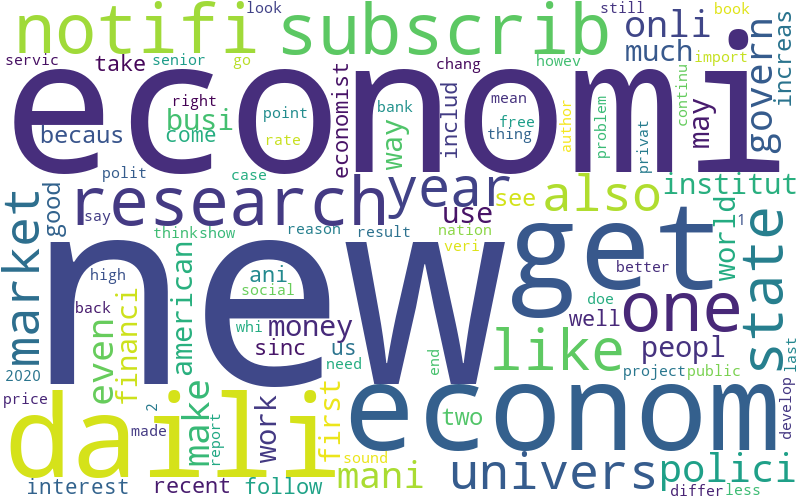

In [ ]:
from IPython.display import Image
from wordcloud import WordCloud 

def draw_wordcloud(counter, image_file_name, max_words=100):
    wc = WordCloud(background_color="white", max_words=max_words, width=800, height=500)
    wc.generate_from_frequencies(counter)
    wc.to_file(image_file_name)
    display(Image(filename=image_file_name))
    
draw_wordcloud(counter_all, f"{data_folder}/final_wordcloud_all.png", 100)

전체 워드들을 대상으로 한 결과를 통해 기사의 본문들이
미국의 경제를 기준으로 그 속에서도 정치, 교육 등 다양한 분야를 다루는 것이라고 파악됨. 

다만, 품사별로 키워드 추출을 해봐야 의미있는 결과를 얻어낼 수 있을 것이라 생각함.

### Popular Nouns Representing Hot Topics

In [ ]:
counter_nouns = get_counter(df, global_stopwords+local_stopwords+etc_stopwords, "NN")
counter_nouns.most_common(50)

[('economi', 5630),
 ('daili', 4971),
 ('econom', 4853),
 ('subscrib', 4523),
 ('research', 4414),
 ('state', 4040),
 ('year', 4024),
 ('univers', 4011),
 ('market', 3943),
 ('polici', 3766),
 ('money', 3349),
 ('institut', 3210),
 ('peopl', 3175),
 ('world', 3125),
 ('work', 3099),
 ('way', 3081),
 ('busi', 3077),
 ('economist', 2850),
 ('interest', 2828),
 ('rate', 2623),
 ('point', 2616),
 ('govern', 2582),
 ('project', 2522),
 ('book', 2503),
 ('result', 2434),
 ('price', 2406),
 ('problem', 2377),
 ('nation', 2344),
 ('use', 2338),
 ('polit', 2333),
 ('reason', 2313),
 ('mani', 2302),
 ('case', 2286),
 ('howev', 2256),
 ('import', 2229),
 ('becaus', 2204),
 ('thing', 2197),
 ('bank', 2192),
 ('sound', 2163),
 ('report', 2158),
 ('product', 2157),
 ('month', 2157),
 ('author', 2151),
 ('street', 2122),
 ('today', 2107),
 ('level', 2090),
 ('effect', 2089),
 ('system', 2088),
 ('part', 2076),
 ('percent', 2069)]

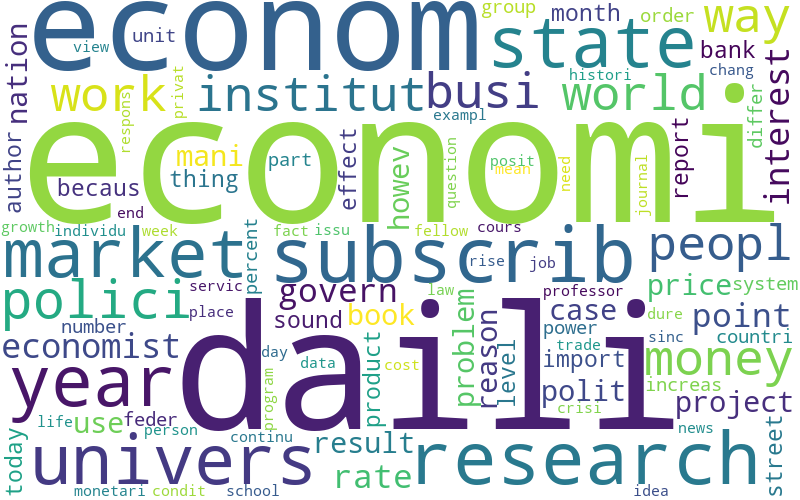

In [ ]:
draw_wordcloud(counter_nouns, f"{data_folder}/final_wordcloud_nouns.png", 100)

명사들만을 대상으로 한 키워드 분석에서는 economi(economy), market, money, economist와 같은 경제관련 용어들이 상위권에 등장했고, 그밖에 polit(political),govern 와 같은 정치 관련 표현들이 등장하였음. 경제 분야를 다루고 있는 사이트 특성상 경제, 정책관련된 표현들이 많은 것으로 예측됨.   

### Popular Adjectives Representing Emotional Aspects

In [ ]:
counter_adjs = get_counter(df, global_stopwords+local_stopwords+etc_stopwords, "JJ")
counter_adjs.most_common(50)

[('new', 5835),
 ('econom', 3849),
 ('american', 3286),
 ('govern', 3030),
 ('recent', 2934),
 ('good', 2915),
 ('public', 2575),
 ('financi', 2499),
 ('last', 2489),
 ('first', 2408),
 ('free', 2396),
 ('high', 2375),
 ('much', 2320),
 ('senior', 2307),
 ('mani', 2258),
 ('social', 2184),
 ('current', 2153),
 ('global', 2125),
 ('great', 2115),
 ('onli', 2036),
 ('ani', 2025),
 ('central', 2018),
 ('less', 1932),
 ('better', 1864),
 ('major', 1858),
 ('real', 1857),
 ('higher', 1801),
 ('wall', 1789),
 ('actual', 1770),
 ('best', 1757),
 ('u.s.', 1752),
 ('general', 1738),
 ('clear', 1737),
 ('second', 1711),
 ('former', 1658),
 ('least', 1645),
 ('certain', 1599),
 ('human', 1577),
 ('larg', 1506),
 ('particular', 1470),
 ('intern', 1439),
 ('veri', 1437),
 ('small', 1396),
 ('polit', 1396),
 ('everi', 1386),
 ('low', 1384),
 ('live', 1379),
 ('past', 1374),
 ('popular', 1373),
 ('long', 1328)]

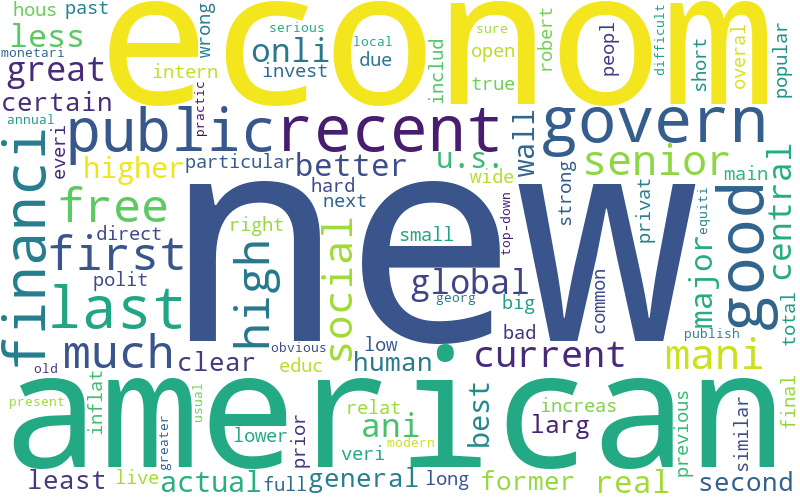

In [ ]:
draw_wordcloud(counter_adjs, f"{data_folder}/final_wordcloud_adjs.png", 100)

형용사들만을 대상으로 한 키워드 분석에서는 앞서 진행했던 명사만을 대상으로 한 키워드 분석 결과에서 경제관련된 단어들이 주를 이룬 결과에 따라 free,high,much,mani(many),less,larg(large)와 같은 수량, 비교의 표현이 다수 등장했다. 아울러 polit(political)와 같이 정치관련된 표현도 등장하였다.


### Popular Verbs Representing Behavioral Aspects

In [ ]:
counter_verbs = get_counter(df, global_stopwords+local_stopwords+etc_stopwords, "VB")
counter_verbs.most_common(100)

[('get', 4919),
 ('make', 3487),
 ('see', 2907),
 ('take', 2789),
 ('come', 2412),
 ('say', 2318),
 ('go', 2297),
 ('made', 2205),
 ('know', 2036),
 ('seem', 2012),
 ('want', 1942),
 ('follow', 1934),
 ('econom', 1900),
 ('put', 1896),
 ('think', 1885),
 ('need', 1871),
 ('use', 1857),
 ('remain', 1849),
 ('includ', 1812),
 ('onli', 1796),
 ('develop', 1751),
 ('sound', 1710),
 ('find', 1680),
 ('said', 1661),
 ('hold', 1652),
 ('appear', 1598),
 ('becom', 1544),
 ('given', 1539),
 ('found', 1499),
 ('suggest', 1491),
 ('keep', 1472),
 ('doe', 1434),
 ('show', 1424),
 ('give', 1412),
 ('let', 1395),
 ('provid', 1389),
 ('help', 1334),
 ('sinc', 1331),
 ('expect', 1326),
 ('look', 1284),
 ('mean', 1282),
 ('came', 1255),
 ('work', 1232),
 ('serv', 1210),
 ('happen', 1205),
 ('continu', 1203),
 ('allow', 1192),
 ('pay', 1187),
 ('becaus', 1182),
 ('consid', 1182),
 ('turn', 1177),
 ('call', 1160),
 ('increas', 1157),
 ('reduc', 1150),
 ('set', 1148),
 ('live', 1146),
 ('creat', 1132),
 (

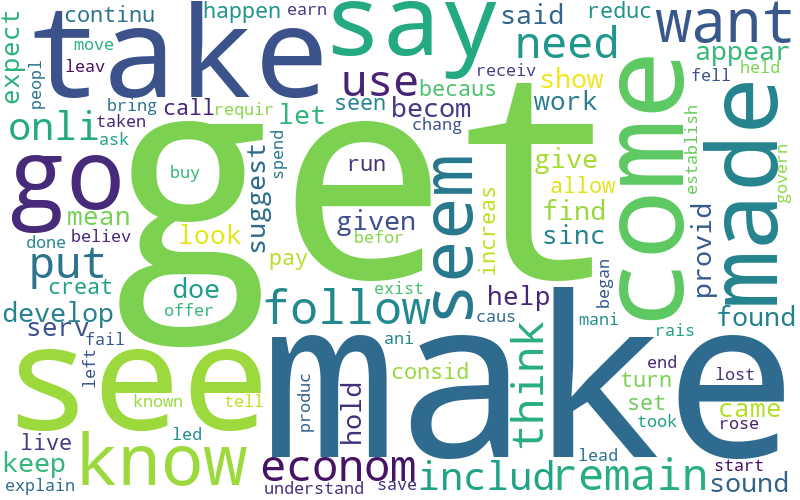

In [ ]:
draw_wordcloud(counter_verbs, f"{data_folder}/final_wordcloud_verbs.png", 100)

동사로 한정지은 키워드 분석에서는 범위가 너무 다양해 눈에 띄는 단어는 보이지 않았음.

명사와 형용사별 키워드 분석에서 경제를 다루는 기사들이 많은 것을 얻어냈으나, 너무 많은 데이터 탓에 구체적인 결과를 뽑아내지는 못함.
전체 문서가 대상이 아닌 기간별로의 키워드를 뽑으면 더 의미있는 결과가 관찰되지 않을까 생각함.

## Time Series Analysis

수집된 웹 페이지들이 게재된 기간은 2008년 11월 24일부터 2021년 11월 15일로서 약
13년의 time range를 가짐. 

In [ ]:
import numpy as np

count = pd.Series(data=1, index=df.datetime).resample(rule="y").count()
count

datetime
2008-12-31       1
2009-12-31      40
2010-12-31     576
2011-12-31     354
2012-12-31     187
2013-12-31      17
2014-12-31      81
2015-12-31     356
2016-12-31     313
2017-12-31     426
2018-12-31     789
2019-12-31    1057
2020-12-31    1388
2021-12-31    1297
Freq: A-DEC, dtype: int64

In [ ]:
count.values

array([   1,   40,  576,  354,  187,   17,   81,  356,  313,  426,  789,
       1057, 1388, 1297])

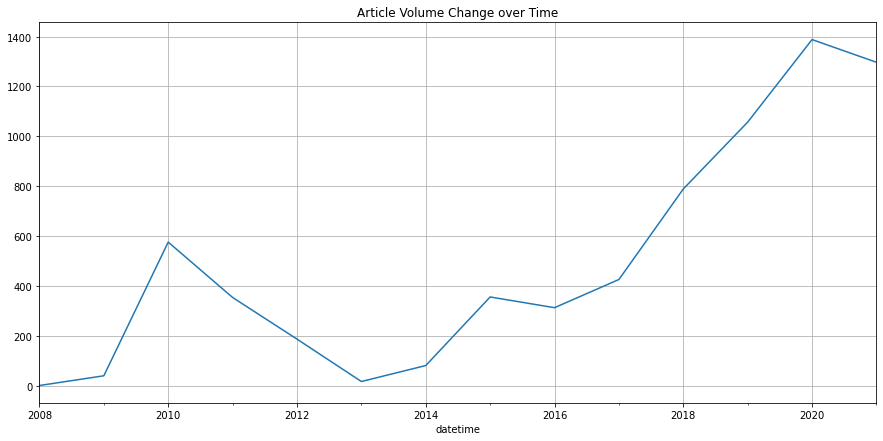

In [ ]:
count.plot(kind="line", title="Article Volume Change over Time", figsize=(15,7), grid=True)

In [ ]:
count.mean(), count.std()

(491.57142857142856, 470.04266815908306)

년도별 게재 건수의 평균은 약 490건, 표준편차는 약 470건으로서, 매년 평균 490건 정도가 게재되었음. 

### Peak Year Analysis

In [ ]:
count.max(), count.idxmax()

(1388, Timestamp('2020-12-31 00:00:00', freq='A-DEC'))

가장 많이 게재된 peak year는 2020년도로써,이 기간 동안 평균 490건을 크게 웃도는 1388건의 글이 게재되었음.  

In [ ]:
df[(df.datetime < "2020-12-31") & (df.datetime >= "2019-12-31")][["title", "body"]]

,title,body
3814,It Is Time To Call Shenanigans!,"Robert E. Wright – June 11, 2020 Reading Time: 7 minutes AIER >> Daily Economy >> Healthcare >> Education >> Crisis Print ..."
3815,Keep the Fed Out of Municipal Finance,"Thomas L. Hogan – June 11, 2020 Reading Time: 4 minutes AIER >> Sound Money Project >> Economic Education >> Central Banking >> ..."
3816,Lockdowns Drive Up Everyday Prices in May,"Robert Hughes – June 10, 2020 Reading Time: 2 minutes AIER >> Research >> Everyday Price Index Print Note: The Everyday Price I..."
3817,American History Reveals the Alternative to the Police State,"Robert E. Wright – June 10, 2020 Reading Time: 6 minutes AIER >> Daily Economy >> History >> Economic History >> Capitalism ..."
3818,The Fatal Conceit of COVID-19 Epidemic Models,"Gregory van Kipnis – June 10, 2020 Reading Time: 10 minutes AIER >> Daily Economy >> Regulation >> Economic Education >> Crisis..."
...,...,...
5808,Can We Talk About Something Else Now?,"Joakim Book – June 12, 2020 Reading Time: 4 minutes AIER >> Daily Economy >> Unemployment >> Policy >> Crisis Print Until..."
5809,The Day First-World Problems Became Real,"Jeffrey A. Tucker – June 12, 2020 Reading Time: 5 minutes AIER >> Daily Economy >> Free Markets >> Crisis >> Art and Culture ..."
5810,How the Federal Reserve Literally Makes Money,"William J. Luther – June 11, 2020 Reading Time: 4 minutes AIER >> Sound Money Project >> Monetary Policy >> Economic Education >>..."
5811,Labor Market on the Mend as Lockdowns Ease,"Robert Hughes – June 11, 2020 Reading Time: 2 minutes AIER >> Daily Economy >> Business Conditions Print Initial claims for une..."


In [ ]:
counter_peak = get_counter(df[(df.datetime < "2020-12-31") & (df.datetime >= "2019-12-31")], global_stopwords+local_stopwords+etc_stopwords,"NN")
counter_peak.most_common(100)

[('economi', 1318),
 ('daili', 1265),
 ('econom', 1248),
 ('research', 1201),
 ('univers', 1147),
 ('state', 1113),
 ('year', 976),
 ('peopl', 966),
 ('institut', 912),
 ('subscrib', 906),
 ('world', 892),
 ('polici', 882),
 ('way', 866),
 ('work', 859),
 ('market', 856),
 ('busi', 839),
 ('book', 800),
 ('point', 725),
 ('mani', 716),
 ('case', 712),
 ('govern', 709),
 ('economist', 687),
 ('result', 674),
 ('author', 670),
 ('reason', 664),
 ('number', 654),
 ('thing', 654),
 ('order', 649),
 ('becaus', 647),
 ('polit', 637),
 ('nation', 636),
 ('month', 633),
 ('rate', 608),
 ('problem', 605),
 ('report', 604),
 ('respons', 603),
 ('part', 602),
 ('crisi', 598),
 ('interest', 598),
 ('effect', 597),
 ('street', 592),
 ('day', 590),
 ('use', 588),
 ('person', 587),
 ('place', 587),
 ('countri', 581),
 ('import', 574),
 ('histori', 569),
 ('professor', 566),
 ('fellow', 565),
 ('level', 565),
 ('fact', 554),
 ('power', 554),
 ('group', 551),
 ('end', 547),
 ('differ', 544),
 ('product

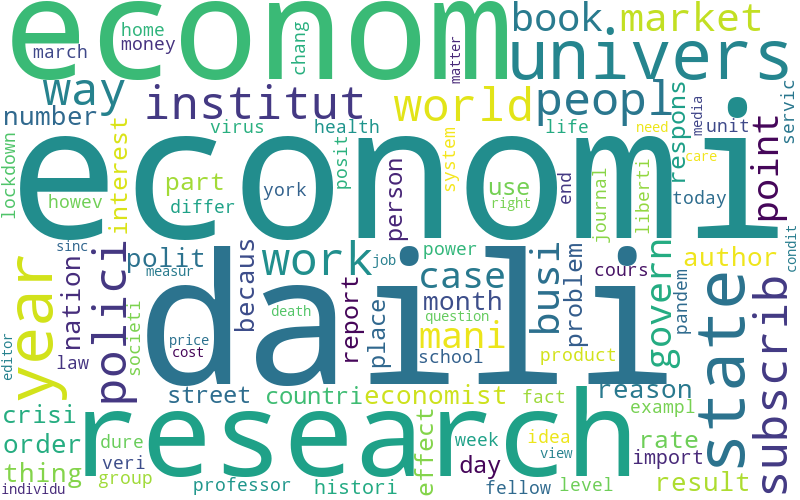

In [ ]:
draw_wordcloud(counter_peak, f"{data_folder}/final_wordcloud_2019.png", 100)

2020년도에 유행한 코로나19관련 키워드(virus, lockdown, health, crisis) 들이 등장하는 것을 알 수 있음.
이에 많은 기사가 기재되었다고 생각됨.



## Document Clustering

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf=True, norm="l2", stop_words=global_stopwords+local_stopwords+etc_stopwords, max_df=0.7)
X = vectorizer.fit_transform(df.body)

In [ ]:
X.shape

(6882, 62519)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6882 entries, 0 to 6881
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   file_name          6882 non-null   object        
 1   title              6882 non-null   object        
 2   author             6882 non-null   object        
 3   datetime           6882 non-null   datetime64[ns]
 4   body               6882 non-null   object        
 5   words              6882 non-null   object        
 6   tagged_words       6882 non-null   object        
 7   stems              6882 non-null   object        
 8   tagged_words_ver2  6882 non-null   object        
 9   cluster            6882 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(8)
memory usage: 510.9+ KB


There are 6,882 documents and 62,519 words, or features. 

### K-Means Clustering

### Step 1. Choose the number of clusters

In [ ]:
k = 5

### Step 2. Initialize a model object for k-means clustering

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k, random_state=0)
kmeans

KMeans(n_clusters=5, random_state=0)

### Step 3. Fit the model using the input data

In [ ]:
%time kmeans.fit(X)

CPU times: user 17.7 s, sys: 222 ms, total: 18 s
Wall time: 10.7 s


KMeans(n_clusters=5, random_state=0)

### Step 4. Examine the clustering outcome

The focus of this step should be on identifying the characteristics of each cluster. 

In [ ]:
kmeans.labels_

array([3, 3, 3, ..., 0, 0, 0], dtype=int32)

In [ ]:
df["cluster"] = kmeans.labels_

In [ ]:
df[["title", "body", "cluster"]]

,title,body,cluster
0,“Which is Better: High or Low Inflation?”,"Tom Duncan – October 5, 2010 Reading Time: < 1 minute AIER >> Sound Money Project >> Sound Money Project >> Sound Banking >> Mo...",3
1,“Why is inflation bad?”,"Tom Duncan – October 4, 2010 Reading Time: < 1 minute AIER >> Sound Money Project >> Sound Money Project >> Monetary Policy >> ...",3
2,“Tea Partiers support audit of Federal Reserve”,"Tom Duncan – October 1, 2010 Reading Time: < 1 minute AIER >> Sound Money Project >> Sound Money Project >> Monetary Policy >> ...",3
3,“Federal Reserve ‘Will Be Gone’ In 25 Years”,"Tom Duncan – October 1, 2010 Reading Time: < 1 minute AIER >> Sound Money Project >> Sound Money Project >> Sound Banking >> Mo...",3
4,“Rising Gold Prices Affect Local Companies”,"Tom Duncan – September 30, 2010 Reading Time: < 1 minute AIER >> Sound Money Project >> Sound Money Project >> Sound Money >> M...",3
...,...,...,...
6877,Limited Government and Money: A Review of Money and the Rule of Law,"Daniel Sutter – October 26, 2021 Reading Time: 3 minutes AIER >> Daily Economy >> Monetary Policy >> Economic Education >> Book...",4
6878,"All Value Is Subjective, and That’s a Good Thing","James E. Hanley – October 26, 2021 Reading Time: 5 minutes AIER >> Daily Economy >> Free Markets >> Economic Theory >> Economic...",0
6879,The Semantic Revolution,"Daniel B. Klein – October 25, 2021 Reading Time: 3 minutes AIER >> Daily Economy >> History >> Government >> Classical Liberali...",0
6880,Why Government Cover-Ups Succeed,"James Bovard – October 25, 2021 Reading Time: 7 minutes AIER >> Daily Economy >> War and Peace >> Media >> Government >> Aut...",0


In [ ]:
count2 = df.cluster.value_counts()
count2

0    3948
4    1186
2     804
3     712
1     232
Name: cluster, dtype: int64

전체 문서들에 대해 다양한 개수의 클러스터를 찾아본 결과 5개의 클러스터를 찾았을 때 0번에 클러스트들이 집중되어있지만, 이 외에는 비교적 균형있는 클러스터들을 구할 수 있었음.

In [ ]:
cluster_1st, cluster_2nd, cluster_3rd, cluster_4th, cluster_5th= df.cluster.value_counts().index

가장 큰 클러스터는 정책, 노동등에 관한 경제내용임을 확인할 수 있음.

In [ ]:
df[df.cluster == cluster_1st].sample(50, random_state=0)[["title", "body", "cluster"]]     # the largest cluster

,title,body,cluster
3350,What Is Your Coffee Cup’s Country of Origin?,"Jeffrey A. Tucker – March 7, 2019 Reading Time: 4 minutes AIER >> Daily Economy >> Free Trade Print The trade deficit just soare...",0
3675,The Real Problem With the Health Care System,"Veronique de Rugy – October 23, 2018 Reading Time: 3 minutes AIER >> Daily Economy >> Healthcare Print Health care costs are aga...",0
3247,Zuckerberg Wants to Regulate the Internet. Here’s Why.,"Chloe Anagnos – April 11, 2019 Reading Time: 3 minutes AIER >> Daily Economy >> Technology Print After the murderer behind the h...",0
4176,Counterfactual: What If Government Had Not Intervened?,"John Tamny – March 21, 2020 Reading Time: 7 minutes AIER >> Daily Economy >> Crisis Print “The Pothole” is the title of episode...",0
4557,Suffixing Industrial Policy with “2.0” Doesn’t Make It Credible,"Donald J. Boudreaux – November 18, 2019 Reading Time: 5 minutes AIER >> Daily Economy >> Free Trade Print Industrial policy is ...",0
5174,The Prospects for Global Trade under the New US Administration,"Colin Lloyd – November 26, 2020 Reading Time: 7 minutes AIER >> Daily Economy >> Government >> Free Trade >> Economic Education...",0
2636,Teachers Started Lesson Implementations,"Natalia Smirnova, PhD – September 20, 2017 Reading Time: 2 minutes AIER >> Daily Economy >> Daily Economy News Print One of the ...",0
5795,Thomas Sowell at 90: Understanding Race Relations Around the World,"Richard M. Ebeling – June 16, 2020 Reading Time: 19 minutes AIER >> Daily Economy >> History >> Education >> Economic History ...",0
5652,Fauci Is Wrong: New York Did Not Do it “Correctly”,"Peter C. Earle Fiona Harrigan – July 23, 2020 Reading Time: 5 minutes AIER >> Daily Economy >> History >> Economic Theory >> ...",0
3323,The Killer Had An Ideology,"Jeffrey A. Tucker – March 15, 2019 Reading Time: 4 minutes AIER >> Daily Economy >> History Print “Sir Oswald Mosley is the pers...",0


In [ ]:
counter_max = get_counter(df[df.cluster == cluster_1st], global_stopwords+local_stopwords+etc_stopwords,"NN")
counter_max.most_common(50)

[('economi', 3765),
 ('daili', 3732),
 ('econom', 2780),
 ('research', 2632),
 ('peopl', 2515),
 ('state', 2437),
 ('year', 2397),
 ('institut', 2348),
 ('way', 2324),
 ('univers', 2294),
 ('world', 2257),
 ('work', 2254),
 ('subscrib', 2192),
 ('book', 2093),
 ('market', 2014),
 ('polici', 1984),
 ('govern', 1817),
 ('author', 1785),
 ('mani', 1777),
 ('polit', 1721),
 ('thing', 1712),
 ('reason', 1708),
 ('becaus', 1703),
 ('point', 1702),
 ('use', 1684),
 ('case', 1673),
 ('busi', 1642),
 ('problem', 1631),
 ('nation', 1621),
 ('interest', 1603),
 ('import', 1567),
 ('part', 1524),
 ('day', 1512),
 ('countri', 1495),
 ('person', 1493),
 ('fellow', 1490),
 ('power', 1482),
 ('fact', 1475),
 ('place', 1473),
 ('number', 1465),
 ('differ', 1462),
 ('result', 1462),
 ('today', 1456),
 ('effect', 1434),
 ('life', 1433),
 ('exampl', 1429),
 ('histori', 1403),
 ('order', 1400),
 ('money', 1395),
 ('unit', 1394)]

두번째로 큰 클러스터는 경제관련된 내용중에서 금전적인부분에 대한 내용임.

In [ ]:
df[df.cluster == cluster_2nd].sample(10, random_state=0)[["title", "body", "cluster"]]     # the second largest cluster

,title,body,cluster
2957,Readings on the Fed and Monetary Policy,"Joakim Book – July 20, 2019 Reading Time: 4 minutes AIER >> Daily Economy >> Economic Education Print No discussion on money and...",4
1753,Announcing the sound money essay contest,"Johannes Schmidt – August 10, 2015 Reading Time: 2 minutes AIER >> Sound Money Project >> Sound Money Project Print Sound Money ...",4
3982,Inflation and Coronavirus Monetary Policies,"Gerald P. Dwyer – May 4, 2020 Reading Time: 5 minutes AIER >> Sound Money Project >> Crisis >> Central Banking Print Is ther...",4
3720,Economic Nationalism Is a Terrible Response to the Currency War,"Antony Mueller – October 3, 2018 Reading Time: 6 minutes AIER >> >> Gold Standard Print Problems of the global economy do rarel...",4
794,Ignoble Nobel: Krugman explicitly advocating inflation,"– August 12, 2011 Reading Time: < 1 minute AIER >> Sound Money Project >> Sound Money Project >> Monetary Policy >> International ...",4
2524,Why Is Bitcoin So Valuable?,"William J. Luther – December 5, 2017 Reading Time: 4 minutes AIER >> Sound Money Project >> Sound Money >> Cryptocurrency Prin...",4
1927,"Janet Yellen Tells Senate of Economic Progress, Challenges","Aaron Nathans – February 24, 2015 Reading Time: < 1 minute AIER >> Daily Economy >> Daily Economy News Print Federal Reserve Chai...",4
1920,"Op-ed: Greek solvency requires political reform, support from populace","Johannes Schmidt – March 2, 2015 Reading Time: 2 minutes AIER >> Sound Money Project >> Sound Money Project Print A hard currenc...",4
3100,Monetary Policy and Constrained Discretion,"Alexander William Salter – June 5, 2019 Reading Time: 3 minutes AIER >> Sound Money Project >> Monetary Policy >> Central Banking ...",4
1880,Cato launches new blog: Alt-M,"Johannes Schmidt – April 9, 2015 Reading Time: 2 minutes AIER >> Sound Money Project >> Sound Money Project Print Earlier today, ...",4


In [ ]:
counter_max = get_counter(df[df.cluster == cluster_2nd], global_stopwords+local_stopwords+etc_stopwords,"NN")
counter_max.most_common(50)

[('money', 1143),
 ('project', 1031),
 ('sound', 1005),
 ('bank', 930),
 ('econom', 914),
 ('monetari', 908),
 ('polici', 863),
 ('subscrib', 771),
 ('market', 766),
 ('interest', 725),
 ('research', 715),
 ('univers', 708),
 ('economi', 678),
 ('rate', 669),
 ('state', 658),
 ('world', 658),
 ('price', 607),
 ('reserv', 604),
 ('year', 579),
 ('feder', 573),
 ('work', 571),
 ('professor', 570),
 ('economist', 559),
 ('institut', 556),
 ('currenc', 546),
 ('journal', 535),
 ('system', 515),
 ('fed', 506),
 ('busi', 504),
 ('way', 501),
 ('govern', 500),
 ('financi', 499),
 ('problem', 491),
 ('ph.d.', 470),
 ('effect', 466),
 ('howev', 459),
 ('polit', 456),
 ('use', 446),
 ('credit', 443),
 ('financ', 440),
 ('nation', 438),
 ('review', 435),
 ('point', 429),
 ('crisi', 421),
 ('inflat', 420),
 ('m.a', 418),
 ('reason', 416),
 ('suppli', 415),
 ('increas', 407),
 ('result', 406)]

가장 작은 클러스터는 경제 내용 중에서도 기술에 관한 내용임

In [ ]:
df[df.cluster == cluster_5th].sample(10, random_state=0)[["title", "body", "cluster"]]     # the smallest cluster 

,title,body,cluster
4664,Government Is the Real Victim of “Billionaire Greed”,"Max Gulker – October 15, 2019 Reading Time: 5 minutes AIER >> Daily Economy >> Taxation Print In a June article for AIER, Profe...",1
2931,New Data Show the Trade War’s Mounting Costs,"Max Gulker – July 29, 2019 Reading Time: 4 minutes AIER >> Daily Economy >> Free Trade Print The trade war initiated last year...",1
5793,An Open Letter to the Institute for New Economic Thinking,"Max Gulker – June 16, 2020 Reading Time: 4 minutes AIER >> Daily Economy >> History >> Free Markets >> Economic History >> E...",1
3697,How Government Stifles Choice and Competition at the Pump,"Max Gulker – October 11, 2018 Reading Time: 4 minutes AIER >> Daily Economy >> Regulation Print Government subsidies and regulat...",1
2808,Privately Progressive,"Max Gulker – April 11, 2017 Reading Time: 2 minutes AIER >> Daily Economy >> Daily Economy News Print What if progressives could ...",1
2759,Colonel Harwood’s Principles Ring True Today,"Max Gulker – May 19, 2017 Reading Time: 2 minutes AIER >> Daily Economy >> Daily Economy News Print In 2018, AIER will celebrate...",1
3834,"Massachusetts’ Phased Reopenings Harm Businesses, Help Nobody","Max Gulker – June 7, 2020 Reading Time: 5 minutes AIER >> Daily Economy >> Policy >> Crisis Print AIER’s home state revealed...",1
3417,How a Strong Private Sector Will Address Climate Change,"Max Gulker – February 11, 2019 Reading Time: 5 minutes AIER >> Daily Economy >> Environmentalism Print Though familiar with the ...",1
2604,“Cosmic Seigniorage” Underscores Scarcity of Gold,"Max Gulker – October 16, 2017 Reading Time: 2 minutes AIER >> Daily Economy >> Gold Standard >> Daily Economy News >> Currency ...",1
3233,We Should All Regulate Facebook and Google,"Max Gulker – April 17, 2019 Reading Time: 5 minutes AIER >> Daily Economy >> Regulation Print Our economy depends on the continu...",1


In [ ]:
counter_min = get_counter(df[df.cluster == cluster_5th], global_stopwords+local_stopwords+etc_stopwords,"NN")
counter_min.most_common(30)

[('max', 232),
 ('economi', 232),
 ('gulker', 232),
 ('research', 231),
 ('side', 230),
 ('market', 230),
 ('access', 229),
 ('firm', 229),
 ('approach', 229),
 ('confer', 229),
 ('litig', 229),
 ('area', 229),
 ('writer', 229),
 ('polici', 229),
 ('podcast', 229),
 ('poverti', 229),
 ('competit', 229),
 ('ba', 229),
 ('consult', 229),
 ('michigan', 229),
 ('look', 229),
 ('issu', 229),
 ('appear', 229),
 ('univers', 229),
 ('rais', 229),
 ('phd', 229),
 ('field', 229),
 ('technolog', 229),
 ('stanford', 229),
 ('maxgaier', 229)]

## Topic Modeling

### Step 1. Choose the number of topics

In [ ]:
num_topics =5

### Step 2. Initialize a model object for LDA topic modeling

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

lda = LDA(n_components=num_topics, random_state=0)     # LDA uses randomness to get a probability distribution
lda

LatentDirichletAllocation(n_components=5, random_state=0)

sklearn.decomposition.LatentDirichletAllocation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html

### Step 3. Fit the model using the input data

In [ ]:
%time lda.fit(X)

CPU times: user 28.8 s, sys: 9.14 s, total: 37.9 s
Wall time: 27.9 s


LatentDirichletAllocation(n_components=5, random_state=0)

### Step 4. Examine the output of topic modeling

In [ ]:
def show_topics(model, feature_names, num_top_words):
    for topic_idx, topic_scores in enumerate(model.components_):
        print("*** Topic {}:".format(topic_idx))
        print(" + ".join(["{:.2f} * {}".format(topic_scores[i], feature_names[i]) for i in topic_scores.argsort()[::-1][:num_top_words]]))
        print()

In [ ]:
show_topics(lda, vectorizer.get_feature_names(), 10)

*** Topic 0:
1.01 * nsfr + 0.92 * absinthe + 0.91 * cotswold + 0.90 * howey + 0.83 * marriott + 0.79 * mpc + 0.79 * zeus + 0.64 * kamprad + 0.58 * hays + 0.57 * dmt

*** Topic 1:
0.96 * sprott + 0.91 * gillis + 0.81 * tirole + 0.78 * adulting + 0.72 * swipes + 0.70 * mosley + 0.69 * metin + 0.66 * katha + 0.63 * pollitt + 0.60 * appelton

*** Topic 2:
199.91 * percent + 102.78 * hughes + 82.12 * equity + 82.02 * index + 74.44 * robert + 68.33 * bob + 62.62 * sales + 59.46 * 000 + 57.36 * chart + 57.31 * month

*** Topic 3:
12.12 * archive + 8.61 * taleed + 5.40 * video + 4.34 * 2014 + 3.11 * anarchapulco + 1.95 * bespoke + 1.05 * mackey + 0.95 * olli + 0.86 * minute + 0.81 * rubin

*** Topic 4:
248.90 * money + 176.31 * sound + 153.00 * government + 151.00 * people + 136.36 * project + 134.13 * monetary + 133.63 * policy + 130.37 * fed + 130.31 * inflation + 128.63 * duncan



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Topic Model Visualization

In [ ]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


pyLDAvis: https://github.com/bmabey/pyLDAvis

In [ ]:
pyLDAvis.sklearn.prepare(lda, X, vectorizer)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/root/.local/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.180440 -0.019799       1        1  85.679138
2     -0.005733  0.090005       2        1   9.852679
3     -0.058295 -0.023721       3        1   1.506620
1     -0.058235 -0.023238       4        1   1.484191
0     -0.058177 -0.023247       5        1   1.477371, topic_info=             Term        Freq       Total Category  logprob  loglift
41792     percent  141.000000  141.000000  Default  30.0000  30.0000
27588      hughes   43.000000   43.000000  Default  29.0000  29.0000
48251      robert   52.000000   52.000000  Default  28.0000  28.0000
28862       index   47.000000   47.000000  Default  27.0000  27.0000
1             000   53.000000   53.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
32959       lewes    0.050617    0.482847   Topic5 -10.1285   1.9595
51331      siècle    0.041110    0.410830   Topic5 -10.3365   1.9130
29267      ingvar    0.036755    0.383446   Topic5 -10.4485   1.8700
15242         dba    0.055105    0.581462   Topic5 -10.0435   1.8586
50168  semmelweis    0.051020    0.581359   Topic5 -10.1206   1.7818

[243 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
1          1  0.538258    000
1          2  0.464016    000
1042       1  0.865985   2014
1042       2  0.144331   2014
3386       2  0.841849    adp
...      ...       ...    ...
60882      1  0.572233   week
60882      2  0.400563   week
61722      1  0.994049  world
62069      1  0.798926   year
62069      2  0.195963   year

[184 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 4, 2, 1])

- 다양한 개수의 토픽들을 시도해보아도 항상 2개의 큰 토픽과 서로 대부분 겹치는 작은 토픽들로 나누어지는 것을 확인할 수 있었음. 그 중에서도 가장 결과가 명확한 5개로 토픽을 지정함. 
- 큰 토픽들을 살펴보면 주로 경제관련된 것이지만, 그 중에서도  money, politics등  금전, 정치와 관련된 경제와 investment, market,equity등 시장경제로 토픽이 나눠지는 것을 확인 할 수 있음.
- 하지만 결과를 보다시피 그렇게 확실하게 주제가 나눠지진 않음. 아무래도 경제관련되어서만 다루는 사이트 이다보니, 경계가 모호했던것으로 예상됨.



### Future Work


- 수업시간에 배운 snowballstemmer를 적용하여 전처리를 진행했지만,어간이 불분명한 문제가 있음. 따라서 lemmatize등의 전처리 기술을 추가로 공부하여 전처리를 깔끔하게 하면 좋을것이라 기대됨


- Time series 분석에서 peak year 분석과 해당년도의 텍스트분석을 진행하였는데, 
이 뿐만 아니라 시간에 따른 키워드 랭킹의 변화를 추적해봄으로써 각 년마다의 동향을 파악해보는 것도 의미 있을 것이라 생각됨.


- 경제이외에도 본인이 익숙한 기술, 정치 등의 분야에 대해서도 분석을 해보면 더욱더 흥미로운 결과를 낼 수 있을 것같음